Christopher Rudolph - 45241805 - MQ University

### Mobile Customer Churn

In this Portfolio task you will work with some (fake but realistic) data on Mobile Customer Churn.  Churn is where
a customer leaves the mobile provider.   The goal is to build a simple predictive model to predict churn from available features. 

The data was generated (by Hume Winzar at Macquarie) based on a real dataset provided by Optus.  The data is simulated but the column headings are the same. (Note that I'm not sure if all of the real relationships in this data are preserved so you need to be cautious in interpreting the results of your analysis here).  

The data is provided in file `MobileCustomerChurn.csv` and column headings are defined in a file `MobileChurnDataDictionary.csv` (store these in the `files` folder in your project).

Your high level goal in this notebook is to try to build and evaluate a __predictive model for churn__ - predict the value of the CHURN_IND field in the data from some of the other fields.  Note that the three `RECON` fields should not be used as they indicate whether the customer reconnected after having churned. 

__Note:__ you are not being evaluated on the _accuracy_ of the model but on the _process_ that you use to generate it.  You can use a simple model such as Logistic Regression for this task or try one of the more advanced methods covered in recent weeks.  Explore the data, build a model using a selection of features and then do some work on finding out which features provide the most accurate results.  

### Notes: 
- Churn is when a customer leaves a provider.
- we're building a model to predict churn with given features. 
- be cautious when interpreting reuslts, preservation of data relationships is unknown. 
- `RECON` should not be used, this means a customer has reconnected after churn 

**Column definitions**

*CUST_ID*: customer identifier

*ACCOUNT_TENURE*: how long the account has been active.

*ACCT_CNT_SERVICES*: Total number of services under an account

*CFU*: type of customer

*SERVICE_TENURE*: How many more months the service is active

*PLAN_ACCESS_FEE*: account monthly fee

*BYO_PLAN_STATUS*: Whether customer is on a 'bring your own' plan.

*PLAN_TENURE*: Plan tenure in months, how many months remain.

*MONTHS_OF_CONTRACT_REMAINING* : Contract tenure remaining based on months of contract completed 

*LAST_FX_CONTRACT_DURATION*: last known  fixed contract term

*CONTRACT_STATUS*: no-contract, off-contract or on-contract.

*PREV_CONTRACT_DURATION*: previous contract term. 

*HANDSET_USED_BRAND*: Brand of the mobile phone the customer is using.

*CHURN_IND*

*MONTHLY_SPEND*: Customer's monthly spending

*COUNTRY_METRO_REGION* : region of customer, country or metro. 

*STATE*: Customer's registered State

### Setting up the DF

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
churn = pd.read_csv("files/MobileCustomerChurn.csv", na_values=["NA", "#VALUE!"], index_col='INDEX')
churn.head()

,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,...,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,RECON_SMS_NEXT_MTH,RECON_TELE_NEXT_MTH,RECON_EMAIL_NEXT_MTH
INDEX,,,,,,,,,,,,,,,,,,,,,
1,1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,...,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA,NaN,NaN,NaN
2,2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,...,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW,NaN,NaN,NaN
3,5,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,...,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA,NaN,NaN,NaN
4,6,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,...,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC,NaN,NaN,NaN
5,8,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,...,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW,NaN,NaN,NaN


Removing the `RECON` fields as per the directions of the task. 

In [3]:
churn = churn.drop(columns=['RECON_SMS_NEXT_MTH','RECON_TELE_NEXT_MTH','RECON_EMAIL_NEXT_MTH'])

Changing the columns to lower case for ease of referencing

In [4]:
churn.columns = churn.columns.str.lower()

### Exploring the DF

Checking what the `cfu` column contains

In [5]:
set(list(churn['cfu']))

{'CONSUMER', 'SMALL BUSINESS'}

In [6]:
len(churn[churn['cfu'] == 'CONSUMER'])

39087

In [7]:
len(churn[churn['cfu'] == 'SMALL BUSINESS'])

7119

In [8]:
round((len(churn[churn['cfu'] == 'SMALL BUSINESS']) / len(churn))*100, 2)

15.41

Small business account for about 15% of all the accounts, therefore consumers equate to about 75% for all the accounts

In [9]:
round((len(churn[churn['byo_plan_status'] == 'BYO']) / len(churn))*100, 2)

23.22

About 22% of all the accounts are BYO plan status

About 34% of all accounts have different `account_tenure` to `service_tenure`. What does it mean if these two differ? 

In [10]:
round((len(churn[(churn['account_tenure'] == churn['service_tenure']) == False]) / len(churn))*100, 2)

33.82

In [11]:
total = len(churn)
greater = round( 100*(len(churn[churn['account_tenure'] > churn['service_tenure']])/total),2)
lesser = round( 100*(len(churn[churn['account_tenure'] < churn['service_tenure']])/total),2)
equal = round((len(churn[(churn['account_tenure'] == churn['service_tenure']) == True]) / len(churn))*100, 2)

Checking they all add up

In [12]:
greater + lesser + equal

100.0

In [13]:
print(f'account_tenure > service_tenure = {greater}%')
print(f'account_tenure < service_tenure = {lesser}%')
print(f'account_tenure = service_tenure = {equal}%')

account_tenure > service_tenure = 18.19%
account_tenure < service_tenure = 15.63%
account_tenure = service_tenure = 66.18%


In [14]:
greater2 = round( 100*(len(churn[churn['account_tenure'] > churn['plan_tenure']])/total),2)
lesser2 = round( 100*(len(churn[churn['account_tenure'] < churn['plan_tenure']])/total),2)
equal2 = round((len(churn[(churn['account_tenure'] == churn['plan_tenure']) == True]) / len(churn))*100, 2)

In [15]:
print(f'account_tenure > plan_tenure = {greater2}%')
print(f'account_tenure < plan_tenure = {lesser2}%')
print(f'account_tenure = plan_tenure = {equal2}%')

account_tenure > plan_tenure = 72.29%
account_tenure < plan_tenure = 0.04%
account_tenure = plan_tenure = 27.67%


In [16]:
greater3= round( 100*(len(churn[churn['service_tenure'] > churn['plan_tenure']])/total),2)
lesser3 = round( 100*(len(churn[churn['service_tenure'] < churn['plan_tenure']])/total),2)
equal3 = round((len(churn[(churn['service_tenure'] == churn['plan_tenure']) == True]) / len(churn))*100, 2)

In [18]:
print(f'service_tenure > plan_tenure = {greater3}%')
print(f'service_tenure < plan_tenure = {lesser3}%')
print(f'service_tenure = plan_tenure = {equal3}%')

service_tenure > plan_tenure = 64.09%
service_tenure < plan_tenure = 0.0%
service_tenure = plan_tenure = 35.91%


Checking if there are any correlations between the 3 tenures 

In [19]:
tenureList = ['account_tenure','service_tenure','plan_tenure']

In [21]:
churn[tenureList].corr()

,account_tenure,service_tenure,plan_tenure
account_tenure,1.000000,0.791784,0.247583
service_tenure,0.791784,1.000000,0.218260
plan_tenure,0.247583,0.218260,1.000000


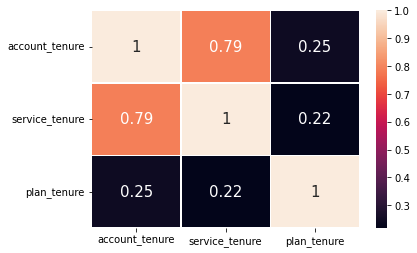

In [27]:
sns.heatmap((churn[tenureList].corr()), linewidths = 0.5, annot=True, annot_kws={"fontsize":15})

In [15]:
zeroRemain = round(len(churn[churn['months_of_contract_remaining'] == 0])*100/total, 2)

In [16]:
print(f'{zeroRemain}% of contracts have no remaining months in their contract')

38.79% of contracts have no remaining months in their contract


In [17]:
print(f"{round(len(churn[churn['last_fx_contract_duration'] == churn['prev_contract_duration']])*100/total,2)}% of customers had their last fixed contract as their previous contract")

75.77% of customers had their last fixed contract as their previous contract


In [18]:
print(f"{round(len(churn[(churn['churn_ind']==1)& (churn['byo_plan_status']== 'NON BYO')])*100/total,2)}% of customers who did not BYO device churned  ")

28.04% of customers who did not BYO device churned  


Creating two different DFs, one for consumers and one for business'

In [43]:
churn_c= churn[churn['cfu'] =='CONSUMER']
churn_b = churn[churn['cfu'] == 'SMALL BUSINESS']

Dropping the `cfu` column as it will no longer be needed and the cust_id as we don't want to identify customers

In [44]:
churn_c = churn_c.drop(columns=['cfu', 'cust_id'])
churn_b = churn_b.drop(columns=['cfu', 'cust_id'])

In [49]:
churn_b

,account_tenure,acct_cnt_services,age,service_tenure,plan_access_fee,byo_plan_status,plan_tenure,months_of_contract_remaining,last_fx_contract_duration,contract_status,prev_contract_duration,handset_used_brand,churn_ind,monthly_spend,country_metro_region,state
INDEX,,,,,,,,,,,,,,,,
22,67,4,53.0,67,31.81,BYO,22,0,12,OFF-CONTRACT,12,APPLE,1,68.17,COUNTRY,NSW
23,4,1,26.0,4,72.72,NON BYO,4,20,24,ON-CONTRACT,24,OTHER,1,84.53,COUNTRY,VIC
36,58,1,41.0,58,31.81,BYO,26,0,24,OFF-CONTRACT,24,APPLE,1,38.16,METRO,VIC
40,78,1,27.0,78,53.63,NON BYO,54,0,24,OFF-CONTRACT,24,APPLE,1,3.42,METRO,NSW
44,57,1,26.0,57,27.27,BYO,9,3,12,ON-CONTRACT,24,APPLE,1,48.79,METRO,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46171,89,1,62.0,89,27.27,BYO,17,0,12,OFF-CONTRACT,12,APPLE,0,27.27,METRO,QLD
46174,53,1,27.0,53,54.54,NON BYO,5,19,24,ON-CONTRACT,24,SAMSUNG,0,54.54,COUNTRY,NSW
46177,99,1,60.0,102,54.54,NON BYO,14,10,24,ON-CONTRACT,24,APPLE,0,67.49,COUNTRY,NSW


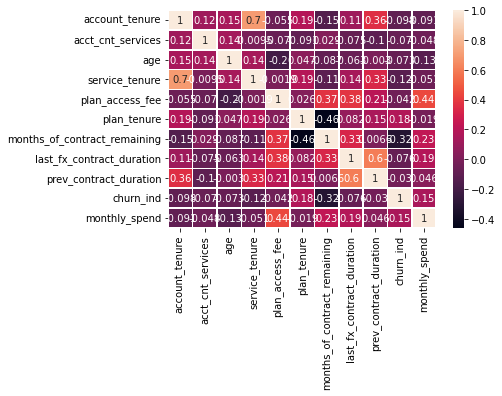

In [48]:
sns.heatmap((churn_b.corr()), linewidths = 0.5, annot=True)

From this DF exploration, we've found:
- no columns are equal. 
- a large number of customers had the 

help with `.select_dtypes` https://stackoverflow.com/questions/12725417/drop-non-numeric-columns-from-a-pandas-dataframe

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html

In [19]:
churn.select_dtypes(['number']).head()

,cust_id,account_tenure,acct_cnt_services,age,service_tenure,plan_access_fee,plan_tenure,months_of_contract_remaining,last_fx_contract_duration,prev_contract_duration,churn_ind,monthly_spend
INDEX,,,,,,,,,,,,
1,1,46,1,30.0,46,54.54,15,0,24,24,1,61.40
2,2,60,3,55.0,59,54.54,5,0,24,24,1,54.54
3,5,65,1,29.0,65,40.90,15,0,12,12,1,2.50
4,6,31,1,51.0,31,31.81,31,0,24,24,1,6.48
5,8,95,1,31.0,95,54.54,0,0,24,24,1,100.22


Setting up a DF for a pairplot

In [26]:
churn['churn_ind'].dtypes

dtype('int64')

Hue might be having issues because its int not categorical. 

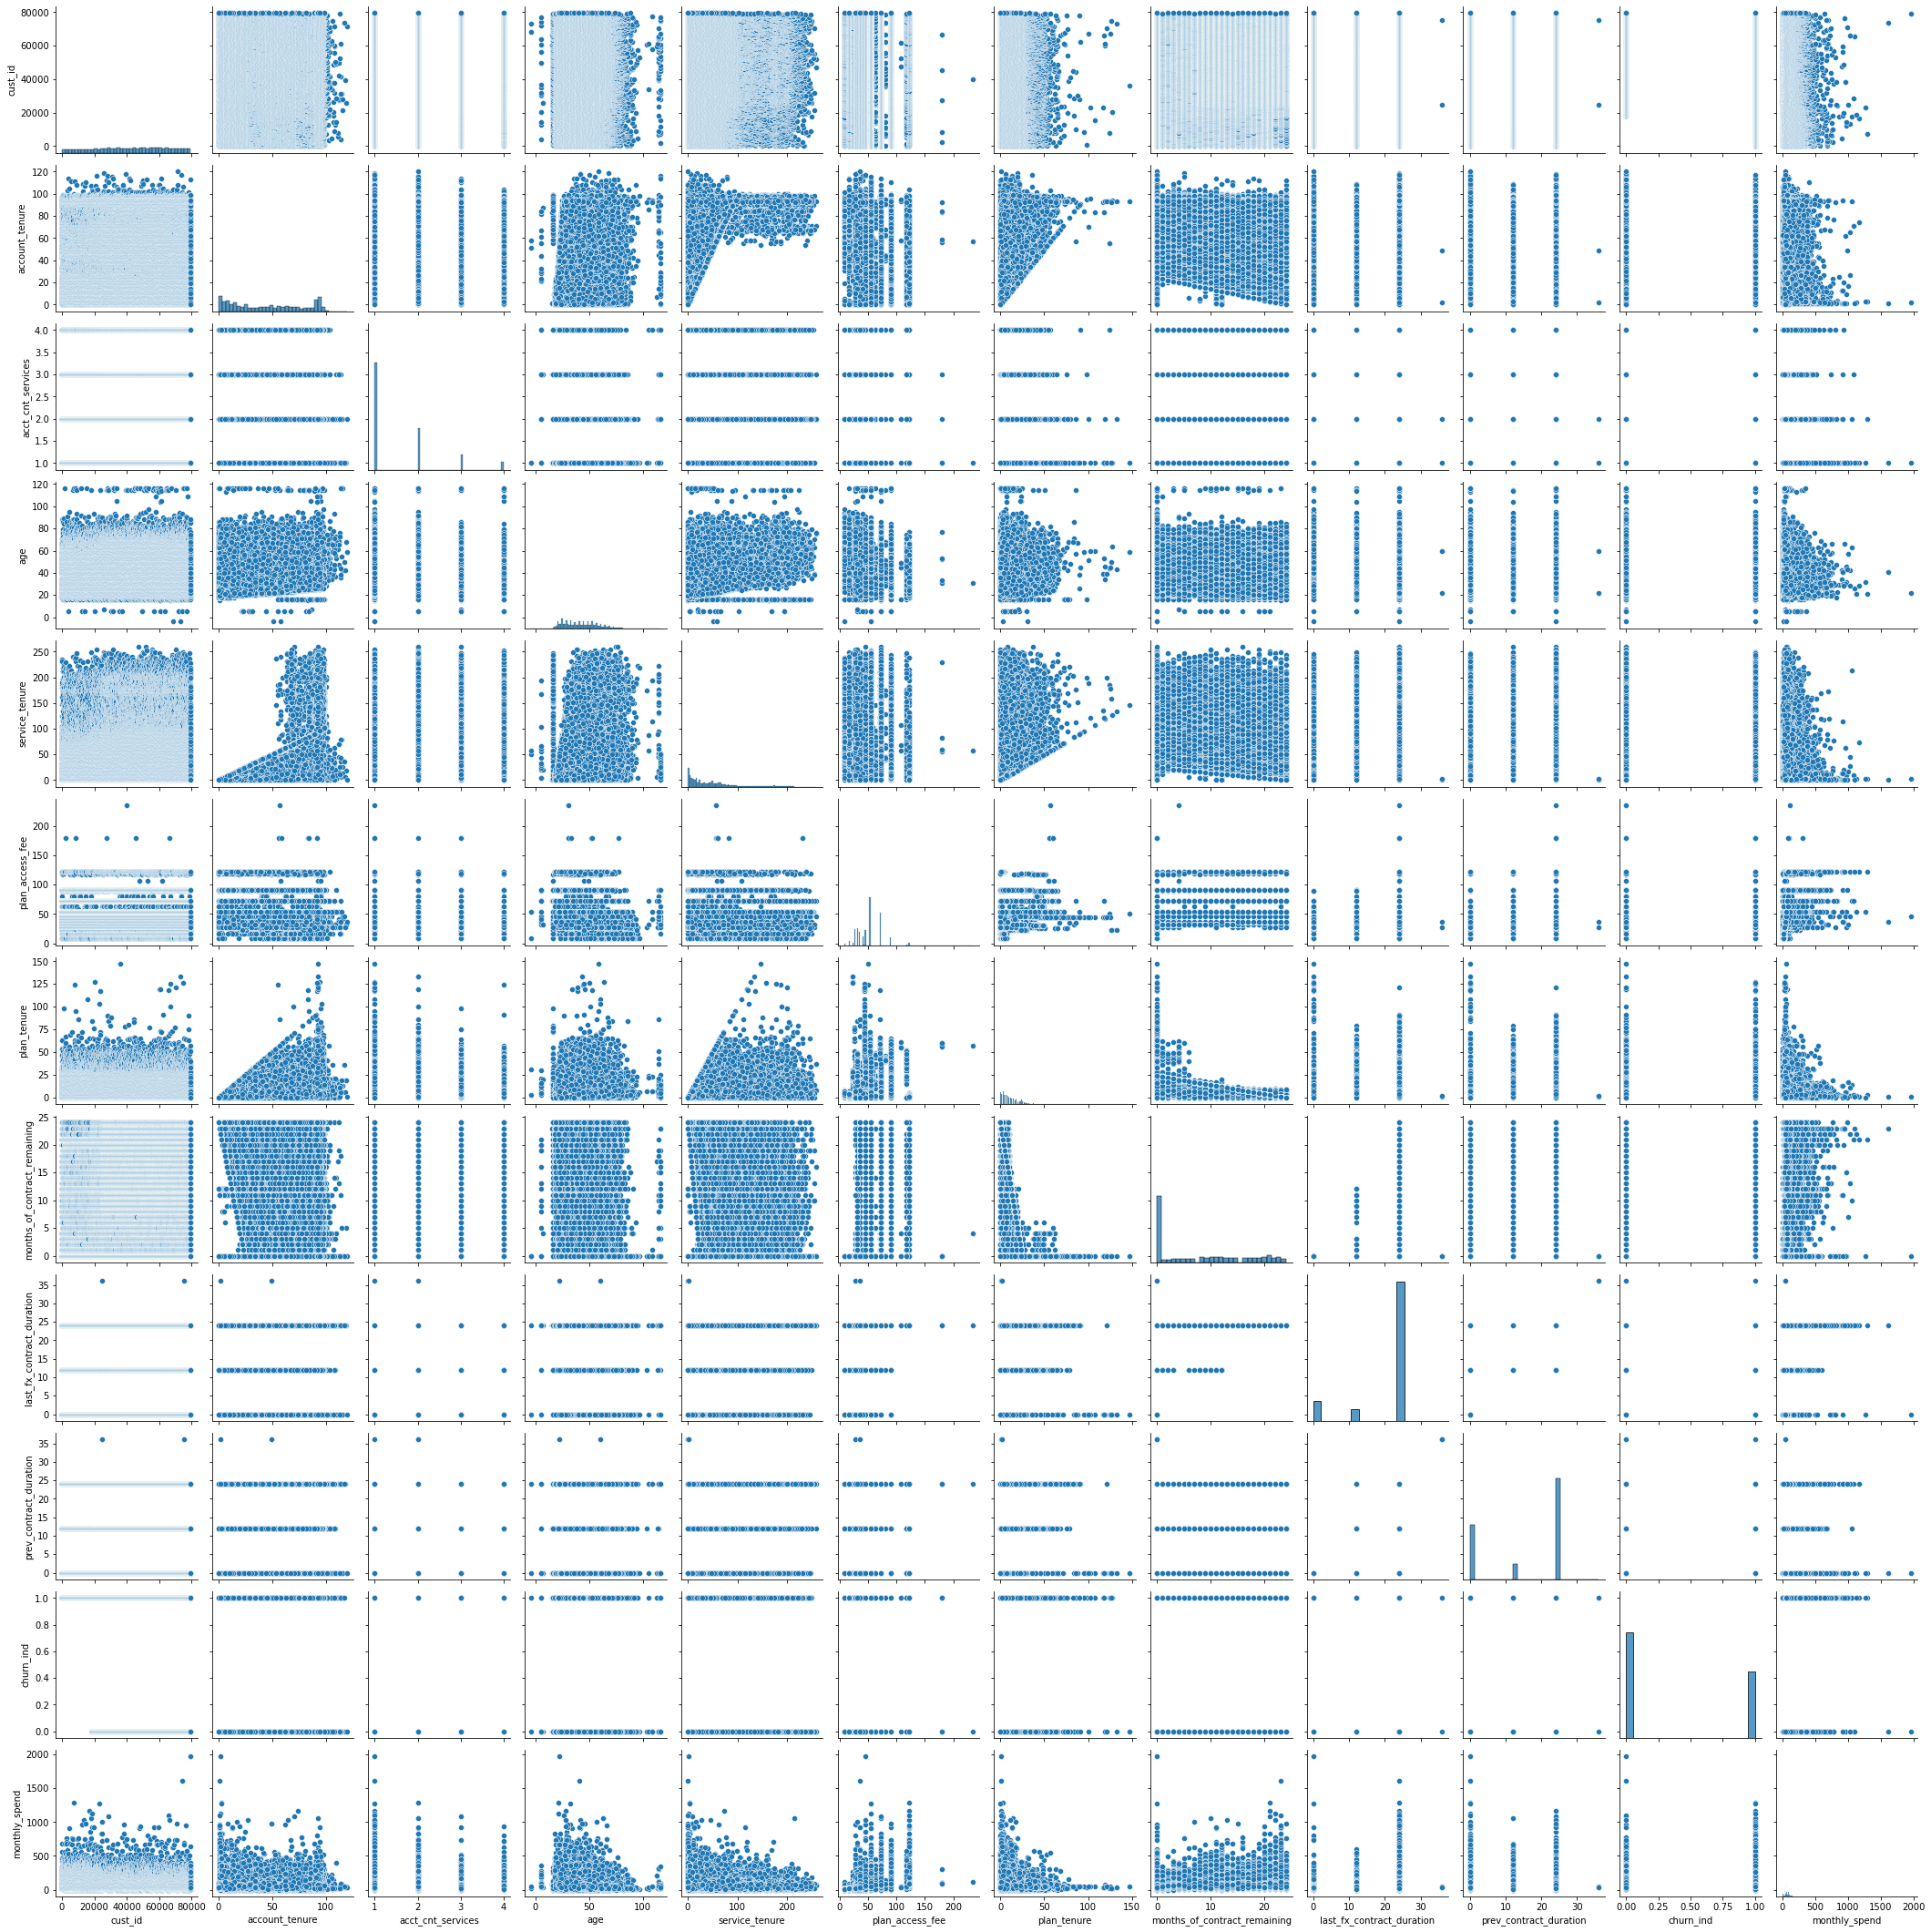

In [21]:
    sns.pairplot(churn.select_dtypes(['number']), hue='churn_ind')